In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

## 1. Ingest and Access Data 

reading csv file into pandas dataframe

Note: Due to technical issues in AWS, we had to abort the database instance and hence backed up the data in csv files.

In [2]:
df = pd.read_csv(r'./Data/darwin_backup2.csv')

#### Data Overview

In [3]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407038081744,P81744,2024-07-03,TD,CCRT,NaN,23:17:00,23:17:30,23:17:00,23:17:00,...,2,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,NaN,23:14:00,23:14:30,23:14:00,23:14:00,...,2,8.0,NaN,NaN,NaN,NaN,f,f,NaN,NaN
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,NaN,23:16:30,23:17:30,23:17:00,23:17:00,...,2,8.0,NaN,NaN,NaN,NaN,f,f,NaN,NaN
3,202407037143658,G43658,2024-07-03,TD,SHAL341,NaN,23:29:00,23:32:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,NaN,23:34:00,23:35:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415067 entries, 0 to 415066
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                415067 non-null  int64  
 1   unique_id               415067 non-null  object 
 2   service_start_date      415067 non-null  object 
 3   update_origin           404173 non-null  object 
 4   train_platform          415067 non-null  object 
 5   working_time_pass       0 non-null       float64
 6   working_time_arrival    415067 non-null  object 
 7   working_time_departure  415067 non-null  object 
 8   planned_time_arrival    375170 non-null  object 
 9   planned_time_departure  373563 non-null  object 
 10  actual_arrival_time     346352 non-null  object 
 11  actual_departure_time   384274 non-null  object 
 12  platform                388485 non-null  object 
 13  train_length            147550 non-null  float64
 14  estimated_time      

## 2. Data Cleaning and Pre-processing

#### Dropping unnecessary columns

In [5]:
df = df.drop(['working_time_pass','estimated_time','source','actual_time','actual_time_class',
              'source_instance','estimated_time_minutes','working_time_arrival','working_time_departure'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415067 entries, 0 to 415066
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                415067 non-null  int64  
 1   unique_id               415067 non-null  object 
 2   service_start_date      415067 non-null  object 
 3   update_origin           404173 non-null  object 
 4   train_platform          415067 non-null  object 
 5   planned_time_arrival    375170 non-null  object 
 6   planned_time_departure  373563 non-null  object 
 7   actual_arrival_time     346352 non-null  object 
 8   actual_departure_time   384274 non-null  object 
 9   platform                388485 non-null  object 
 10  train_length            147550 non-null  float64
 11  is_delayed_arrival      415067 non-null  object 
 12  is_delayed_departure    415067 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 41.2+ MB


#### Checking for duplicates and dropping them as necessary

In [6]:
df.duplicated().sum()

16889

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Reading in a rail reference file to extract the station names for every route

In [8]:
df2 = pd.read_csv("./Data/RailReferences.csv")
df2.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


#### Dropping Unnecessary columns

In [9]:
df2 = df2.drop(["StationNameLang","GridType","AtcoCode","Modification","CreationDateTime","ModificationDateTime","RevisionNumber","CrsCode"],axis=1)
df2

,TiplocCode,StationName,Easting,Northing
0,PENZNCE,Penzance Rail Station,147588,30599
1,STIVES,St Ives (Cornwall) Rail Station,151947,40127
2,CARBISB,Carbis Bay Rail Station,152930,38745
3,STERTH,St Erth Rail Station,154150,35730
4,LELANTS,Lelant Saltings Rail Station,154430,36640
...,...,...,...,...
2623,SMRLYTN,Somerleyton Rail Station,647930,296530
2624,OULTNBS,Oulton Broad South Rail Station,651920,292205
2625,YARMTH,Great Yarmouth Rail Station,652000,308100
2626,OULTNBN,Oulton Broad North Rail Station,652420,293140


### Merging the rail reference dataframe and main dataframes 

In [10]:
merged_df = pd.merge(df, df2, left_on='train_platform', right_on='TiplocCode', how='left')

#### Dropping the tiplocCode column 

In [11]:
df = merged_df.drop(["TiplocCode"],axis = 1)

In [12]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing
0,202407038081744,P81744,2024-07-03,TD,CCRT,23:17:00,23:17:00,NaN,23:17:00,2,NaN,f,f,Cathcart Rail Station,258460.0,660580.0
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,23:14:00,23:14:00,NaN,NaN,2,8.0,f,f,Albany Park Rail Station,547855.0,172860.0
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,23:17:00,23:17:00,23:18:00,23:19:00,2,8.0,f,f,Bexley Rail Station,549380.0,173435.0
3,202407037143658,G43658,2024-07-03,TD,SHAL341,NaN,NaN,23:30:00,23:31:00,NaN,NaN,f,f,NaN,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,NaN,NaN,23:33:00,23:34:00,NaN,NaN,f,f,Shalford (Surrey) Rail Station,500200.0,147100.0


#### Checking for nulls

In [13]:
df.isna().sum()

route_id                       0
unique_id                      0
service_start_date             0
update_origin               9397
train_platform                 0
planned_time_arrival       39538
planned_time_departure     40855
actual_arrival_time        67315
actual_departure_time      29395
platform                   25850
train_length              255400
is_delayed_arrival             0
is_delayed_departure           0
StationName                30672
Easting                    30672
Northing                   30672
dtype: int64

#### Dropping the nulls in Easting and Northing before converting them to Latitude and Longitude

In [14]:
df = df.dropna(subset=['Easting', 'Northing'])

#### Installing bng_latlon package to convert northing and easting to latitude and longitude


In [15]:
# !pip install bng_latlon

#### Creating a user defined function to convert easting and northing values to longitude and latitude and writing to new columns

In [16]:
from bng_latlon import OSGB36toWGS84
def latlong(df):
    lat_long = []
    for i in range(len(df)):
        lat_long.append( OSGB36toWGS84(df[i][0],df[i][1]) )
    return lat_long
df['Easting'] = df['Easting'].astype('int64')
df['Northing'] = df['Northing'].astype('int64')
df1 = df [['Easting','Northing']]
values = (df1.values)
lat_long = latlong(values)
#Writing to dataframe
lat = []
long = []
for i in range(len(lat_long)):
    lat.append(lat_long[i][0])
    long.append(lat_long[i][1])
    
df['Latitude'] = lat
df['Longitude'] = long

#### Creating a new dataframe that drops all null values

In [17]:
na_df = df.dropna()

In [18]:
df = na_df

In [19]:
#getting an overview of the amount of rows dropped and if we should continue with the null dropped dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 2 to 395480
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                103887 non-null  int64  
 1   unique_id               103887 non-null  object 
 2   service_start_date      103887 non-null  object 
 3   update_origin           103887 non-null  object 
 4   train_platform          103887 non-null  object 
 5   planned_time_arrival    103887 non-null  object 
 6   planned_time_departure  103887 non-null  object 
 7   actual_arrival_time     103887 non-null  object 
 8   actual_departure_time   103887 non-null  object 
 9   platform                103887 non-null  object 
 10  train_length            103887 non-null  float64
 11  is_delayed_arrival      103887 non-null  object 
 12  is_delayed_departure    103887 non-null  object 
 13  StationName             103887 non-null  object 
 14  Easting             

After dropping data we are left with ~100,000 datapoints which is ~25% of our total data we started. Observing the volume of the data, we believe this is significant for our analysis.

### Correcting column data types

#### Changing the column type of the route_id appropriately for further analysis

In [20]:
df['route_id'] = df['route_id'].astype(str)

#### Changing the column type of the is_delayed_arrival and is_delayed_departure to boolean

In [21]:
df['is_delayed_arrival'] = np.where(df['is_delayed_arrival'] == "f", False, True)

In [22]:
df['is_delayed_arrival'].value_counts()

False    94854
True      9033
Name: is_delayed_arrival, dtype: int64

In [23]:
df['is_delayed_arrival'].dtype

dtype('bool')

In [24]:
df['is_delayed_departure'] = np.where(df['is_delayed_departure'] == "f", False, True)

In [25]:
df['is_delayed_departure'].value_counts()

False    94850
True      9037
Name: is_delayed_departure, dtype: int64

In [26]:
df['is_delayed_departure'].dtype

dtype('bool')

#### Changing all dates or time columns to the correct data type.

In [27]:
from datetime import time
#changing the columns with dates to datetime objects
df['service_start_date'] = pd.to_datetime(df['service_start_date'])
df['planned_time_arrival'] = pd.to_datetime(df['planned_time_arrival'], format='%H:%M:%S').dt.time
df['planned_time_departure'] = pd.to_datetime(df['planned_time_departure'], format='%H:%M:%S').dt.time
df['actual_arrival_time'] = pd.to_datetime(df['actual_arrival_time'], format='%H:%M:%S').dt.time
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'], format='%H:%M:%S').dt.time

#### Converting all time columns to datetime objects with the service_start_date as the date combined with the timestamp

In [28]:
from datetime import datetime
from datetime import timedelta
df['actual_departure_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_departure_time']), axis=1)
df['planned_time_departure'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_departure']), axis=1)
df['planned_time_arrival'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_arrival']), axis=1)
df['actual_arrival_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_arrival_time']), axis=1)

In [29]:
df.dtypes

route_id                          object
unique_id                         object
service_start_date        datetime64[ns]
update_origin                     object
train_platform                    object
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
platform                          object
train_length                     float64
is_delayed_arrival                  bool
is_delayed_departure                bool
StationName                       object
Easting                            int64
Northing                           int64
Latitude                         float64
Longitude                        float64
dtype: object

#### Creating user defined functions to check for cases of dates arrival times or actual departure times taking place the day after the service start day, and add a day to the column values

In [30]:
from datetime import datetime
from datetime import timedelta

#Adding service_start_date to time objects to get a datetime for every time column
def change_actual_departure(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_departure_time'] < row['planned_time_departure']: 
        return row['actual_departure_time'] + timedelta(days=1)
    return row['actual_departure_time']

def change_arrival(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_arrival_time'] < row['planned_time_arrival']: 
        return row['actual_arrival_time'] + timedelta(days=1)
    return row['actual_arrival_time']

df['actual_departure_time'] = df.apply(change_actual_departure, axis=1)
df['actual_arrival_time'] = df.apply(change_arrival, axis=1)

#### Creating a calculated time difference column for calculating delayed departure and arrival minutes

In [31]:
df['actual_vs_planned_arrival'] = df['actual_arrival_time'] - df['planned_time_arrival']
df['actual_vs_planned_departure'] = df['actual_departure_time'] - df['planned_time_departure']

#### Creating delayed arrival and delayed departure minutes column

In [32]:
df['delayed_arrival_min'] = (df['actual_vs_planned_arrival'].dt.total_seconds() / 60)
df['delayed_departure_min'] = (df['actual_vs_planned_departure'].dt.total_seconds() / 60)

#### Function to calculate origin and destination for each trip

In [33]:
def calculate_origin_destination(group):
    origin = group.iloc[0]['StationName']
    destination = group.iloc[-1]['StationName']
    return pd.Series({
        'Origin': origin,
        'Destination': destination
    })

# Group by route_id, unique_id, and service_start_date, then apply the function to calculate origin and destination
origin_destination = df.groupby(['route_id', 'unique_id', 'service_start_date']).apply(calculate_origin_destination).reset_index()

#Joining into original dataframe
df = df.merge(origin_destination, on=['route_id', 'unique_id', 'service_start_date'], how='left')

In [34]:
df2 = pd.read_excel(r'./Data/2.Passenger_population_station_TOC_2023.xlsx')
df2['StationName'] = df2['StationName'] + ' Rail Station'

In [35]:
merge = df2[['StationName','Operator']]
df = pd.merge(df,merge,left_on='StationName',right_on='StationName',how='left')
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min,Origin,Destination,Operator
0,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,...,173435,51.440218,0.147903,0 days 00:01:00,0 days 00:02:00,1.0,2.0,Bexley Rail Station,Bexley Rail Station,Southeastern
1,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,...,151865,51.254010,-0.328490,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Box Hill & Westhumble Rail Station,Box Hill & Westhumble Rail Station,NaN
2,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,...,124630,51.005680,-0.105078,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station,Govia Thameslink Railway (Southern)
3,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,...,136900,51.116922,-0.161184,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station,Govia Thameslink Railway (Southern)
4,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,...,214175,51.814643,-0.351481,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Harpenden Rail Station,Luton Airport Parkway Rail Station,Govia Thameslink Railway (Thameslink)


In [36]:
df = df.dropna()

#### Getting an overview of the data before exporting to csv file.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93416 entries, 0 to 103886
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   route_id                     93416 non-null  object         
 1   unique_id                    93416 non-null  object         
 2   service_start_date           93416 non-null  datetime64[ns] 
 3   update_origin                93416 non-null  object         
 4   train_platform               93416 non-null  object         
 5   planned_time_arrival         93416 non-null  datetime64[ns] 
 6   planned_time_departure       93416 non-null  datetime64[ns] 
 7   actual_arrival_time          93416 non-null  datetime64[ns] 
 8   actual_departure_time        93416 non-null  datetime64[ns] 
 9   platform                     93416 non-null  object         
 10  train_length                 93416 non-null  float64        
 11  is_delayed_arrival         

In [38]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min,Origin,Destination,Operator
0,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,...,173435,51.440218,0.147903,0 days 00:01:00,0 days 00:02:00,1.0,2.0,Bexley Rail Station,Bexley Rail Station,Southeastern
2,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,...,124630,51.005680,-0.105078,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station,Govia Thameslink Railway (Southern)
3,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,...,136900,51.116922,-0.161184,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station,Govia Thameslink Railway (Southern)
4,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,...,214175,51.814643,-0.351481,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Harpenden Rail Station,Luton Airport Parkway Rail Station,Govia Thameslink Railway (Thameslink)
5,202407037150851,G50851,2024-07-03,TD,LUTOAPY,2024-07-03 23:27:00,2024-07-03 23:28:00,2024-07-03 23:27:00,2024-07-03 23:28:00,4,...,220534,51.872436,-0.395881,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Harpenden Rail Station,Luton Airport Parkway Rail Station,Govia Thameslink Railway (Thameslink)


In [39]:
df.describe()

,train_length,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min
count,93416.000000,93416.000000,93416.000000,93416.000000,93416.000000,93416,93416,93416.000000,93416.000000
mean,7.155359,524881.376263,197182.214567,51.657172,-0.205167,0 days 00:03:52.699751648,0 days 00:04:00.342981930,3.878329,4.005716
std,2.809688,52495.046970,89372.066942,0.807557,0.757898,0 days 00:10:26.026876145,0 days 00:10:25.893705075,10.433781,10.431562
min,2.000000,154150.000000,35730.000000,50.170489,-5.444252,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
25%,4.000000,523448.000000,158508.000000,51.308510,-0.215589,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
50%,8.000000,532180.000000,174913.000000,51.455642,-0.100306,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
75%,8.000000,546195.000000,194500.000000,51.629584,0.103795,0 days 00:03:00,0 days 00:04:00,3.000000,4.000000
max,12.000000,652420.000000,709600.000000,56.273781,1.715711,0 days 04:16:00,0 days 04:14:00,256.000000,254.000000


#### Exporting the dataframe into a csv file for use in PowerBI or other requirements

In [40]:
df.to_csv('./Data/cleanRailData.csv', index=False)

### Delay Prediction Model

Calculating Journey time for each trip

In [41]:
# Group by 'route_id', 'unique_id', 'service_start_date', 'origin', and 'destination' 
grouped = df.groupby(['route_id', 'unique_id', 'service_start_date', 'Origin', 'Destination']) 
# Calculate earliest and latest arrival times within each group
journey_times = grouped['actual_arrival_time'].agg(EarliestArrival='min', LatestArrival='max') 
# Calculate the journey time in minutes 
journey_times['Journey_Time'] = (journey_times['LatestArrival'] - journey_times['EarliestArrival']).dt.total_seconds() / 60 
# Reset index to make it easier to work with 
journey_times = journey_times.reset_index() 
journey_times.head()

,route_id,unique_id,service_start_date,Origin,Destination,EarliestArrival,LatestArrival,Journey_Time
0,202407036700008,C00008,2024-07-03,Irlam Rail Station,Irlam Rail Station,2024-07-03 23:24:00,2024-07-03 23:24:00,0.0
1,202407036706303,C06303,2024-07-03,Bicester North Rail Station,Bicester North Rail Station,2024-07-03 23:29:00,2024-07-03 23:29:00,0.0
2,202407036706305,C06305,2024-07-03,Wembley Stadium Rail Station,Wembley Stadium Rail Station,2024-07-03 23:17:00,2024-07-03 23:17:00,0.0
3,202407036716226,C16226,2024-07-03,Princes Risborough Rail Station,Princes Risborough Rail Station,2024-07-03 23:22:00,2024-07-03 23:22:00,0.0
4,202407036732817,C32817,2024-07-03,Limehouse Rail Station,Limehouse Rail Station,2024-07-03 23:19:00,2024-07-03 23:19:00,0.0


Creating model dataframe and merging on Journey time values

In [42]:
model_df = df[['unique_id','train_length','Operator', 'is_delayed_arrival' ]]

model_df = pd.merge(model_df, journey_times, left_on='unique_id', right_on='unique_id', how='left')
model_df.head()

,unique_id,train_length,Operator,is_delayed_arrival,route_id,service_start_date,Origin,Destination,EarliestArrival,LatestArrival,Journey_Time
0,P97422,8.0,Southeastern,False,202407038097422,2024-07-03,Bexley Rail Station,Bexley Rail Station,2024-07-03 23:18:00,2024-07-03 23:18:00,0.0
1,P97422,8.0,Southeastern,False,202407048097422,2024-07-04,Hither Green Rail Station,Hither Green Rail Station,2024-07-04 22:59:00,2024-07-04 22:59:00,0.0
2,P97422,8.0,Southeastern,False,202407098097422,2024-07-09,London Waterloo East Rail Station,London Waterloo East Rail Station,2024-07-09 22:39:00,2024-07-09 22:39:00,0.0
3,P97422,8.0,Southeastern,False,202407108097422,2024-07-10,Lewisham Rail Station,Crayford Rail Station,2024-07-10 22:58:00,2024-07-10 23:23:00,25.0
4,G54196,12.0,Govia Thameslink Railway (Southern),False,202407037154196,2024-07-03,Haywards Heath Rail Station,Three Bridges Rail Station,2024-07-03 23:17:00,2024-07-03 23:29:00,12.0


Dropping columns in model_df that are no longer needed for the model

In [43]:
model_df = model_df.drop(columns=['route_id','unique_id','service_start_date','Origin',"Destination",'EarliestArrival','LatestArrival'],axis=1)
model_df

,train_length,Operator,is_delayed_arrival,Journey_Time
0,8.0,Southeastern,False,0.0
1,8.0,Southeastern,False,0.0
2,8.0,Southeastern,False,0.0
3,8.0,Southeastern,False,25.0
4,12.0,Govia Thameslink Railway (Southern),False,12.0
...,...,...,...,...
228186,12.0,Govia Thameslink Railway (Thameslink),False,78.0
228187,12.0,Govia Thameslink Railway (Thameslink),False,131.0
228188,12.0,Govia Thameslink Railway (Thameslink),False,157.0
228189,12.0,Govia Thameslink Railway (Thameslink),False,78.0


Creating Dummy Columns for Operator Values

In [44]:
model_df = pd.get_dummies(model_df, columns= ['Operator'],dtype=int)
model_df.head()

,train_length,is_delayed_arrival,Journey_Time,Operator_Avanti West Coast,Operator_Chiltern Railways,Operator_East Midlands Railway,Operator_Elizabeth line,Operator_Govia Thameslink Railway (Gatwick Express),Operator_Govia Thameslink Railway (Great Northern),Operator_Govia Thameslink Railway (Southern),...,Operator_Northern Trains,Operator_ScotRail,Operator_South Western Railway,Operator_Southeastern,Operator_TfW Rail,Operator_TransPennine Express,Operator_Transport for Greater Manchester,Operator_West Midlands Trains (London Northwestern Railway),Operator_West Midlands Trains (West Midlands Railway),Operator_c2c
0,8.0,False,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8.0,False,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8.0,False,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8.0,False,25.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12.0,False,12.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Splitting the data into the training and test sets

In [45]:
from sklearn.model_selection import train_test_split
# separate features and target
X = model_df.drop("is_delayed_arrival", axis=1)
y = model_df["is_delayed_arrival"]

# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

Creating the model

In [46]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
pipe.fit(X_train, y_train)  # apply scaling on training data


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

Running the model and printing the accuracy

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = pipe.predict(X_test)
accuracy_score(y_pred, y_test)

0.9124614894295123

The model was 91.25% correct in predictions.
Next, printing the classification report.

In [48]:
predictions = pipe.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     68712
        True       0.00      0.00      0.00      6592

    accuracy                           0.91     75304
   macro avg       0.46      0.50      0.48     75304
weighted avg       0.83      0.91      0.87     75304



Creating a graph to show the impact of the different variables on prediction

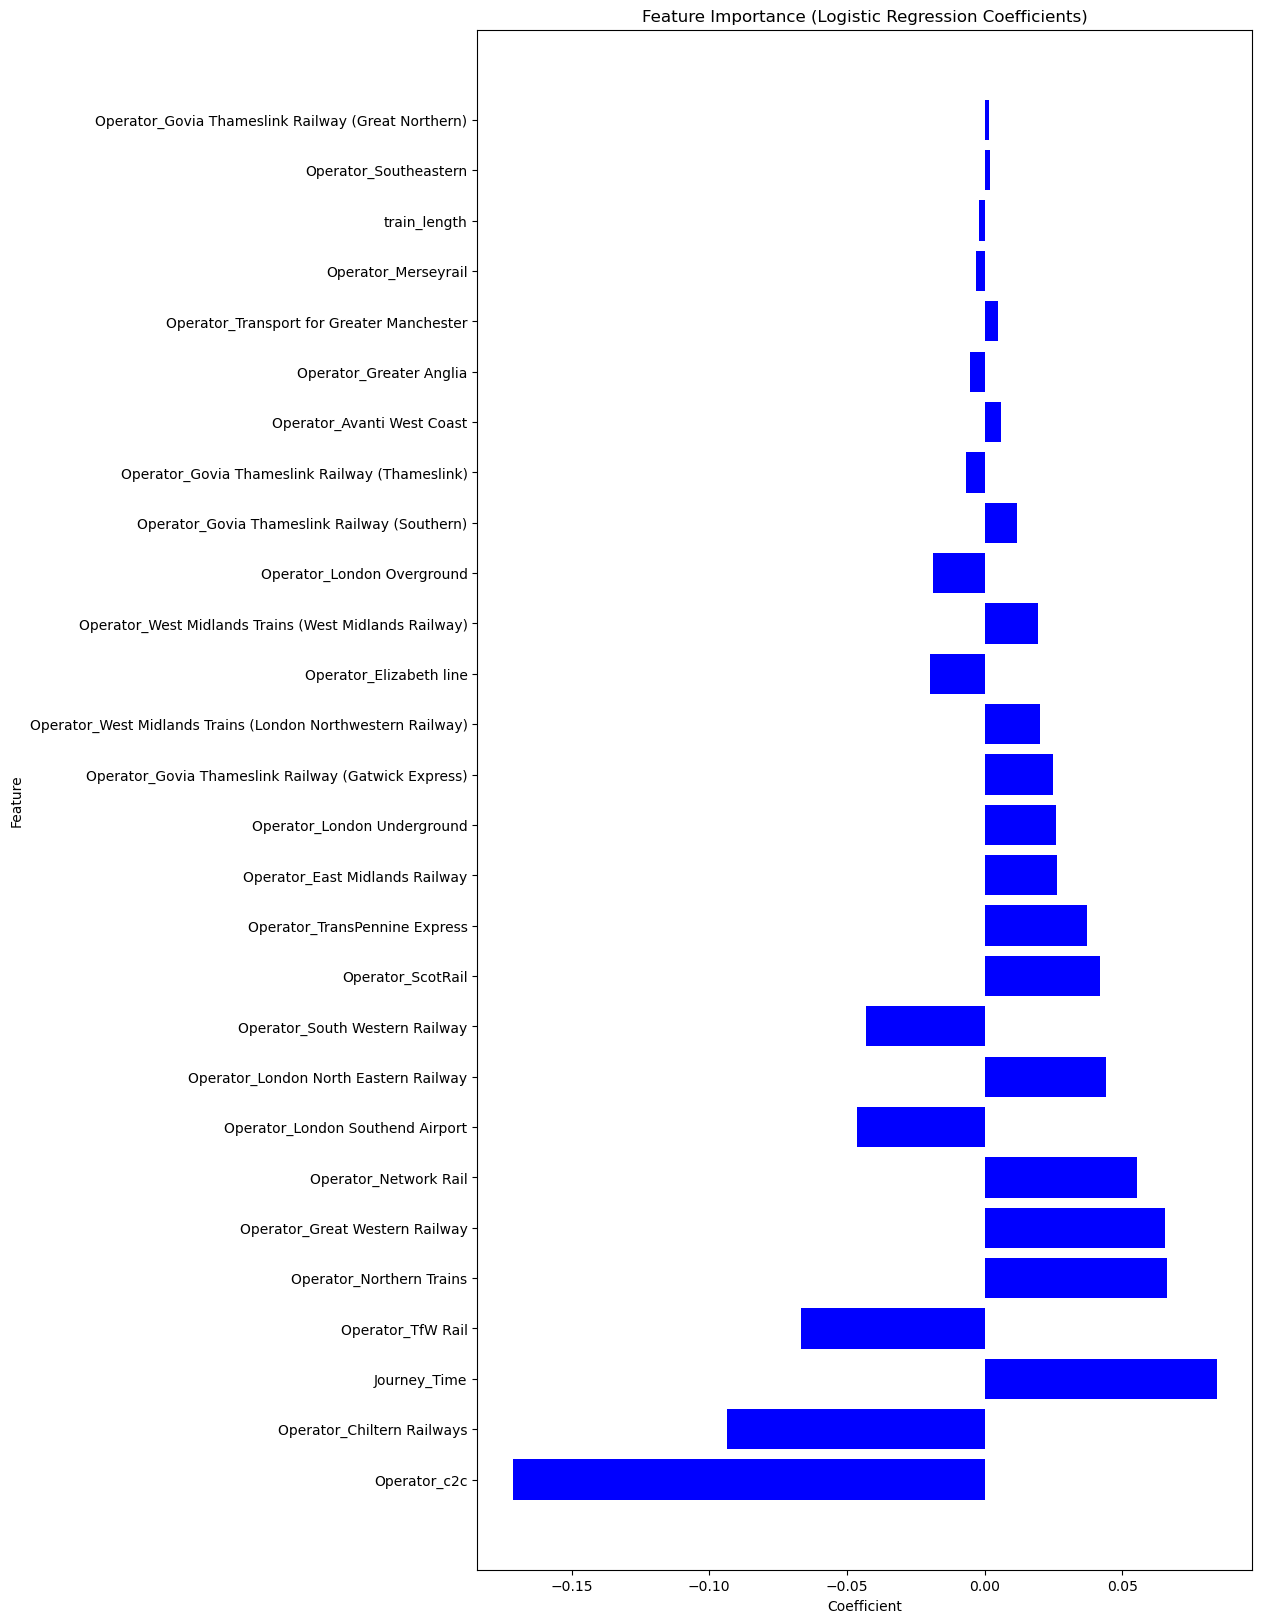

In [49]:
# Get the model from the pipeline
model = pipe.named_steps['logisticregression']

# Get feature names from the DataFrame
feature_names = X.columns

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame for easy handling
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
})

# Sort by the absolute values of the coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='b')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()


As seen in the graph, Journey_Time seems to have the highest coefficent to delayed arrival, while Operator_c2c has the lowest coefficent meaning that Journey_Time has a high impact on delay chances.

## 3. Data Visualization

In [50]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Categorical and Numerical Data


#### Numerical Data

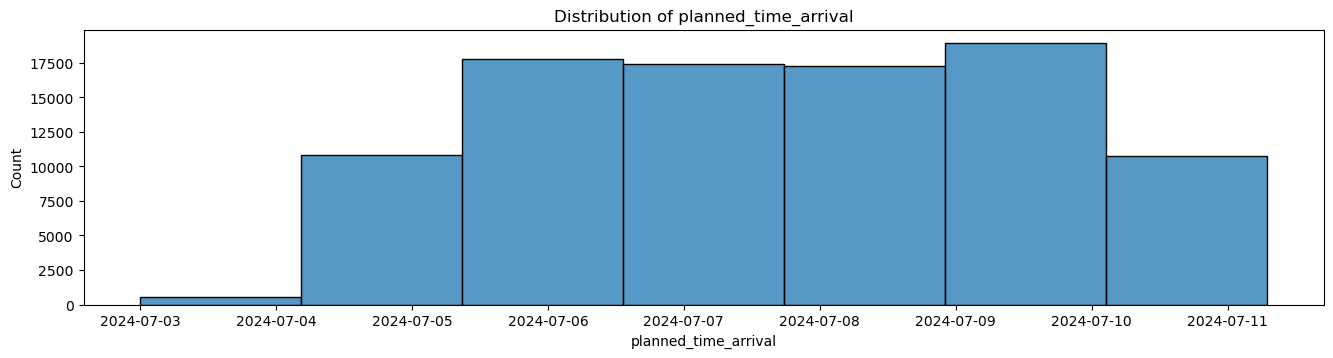

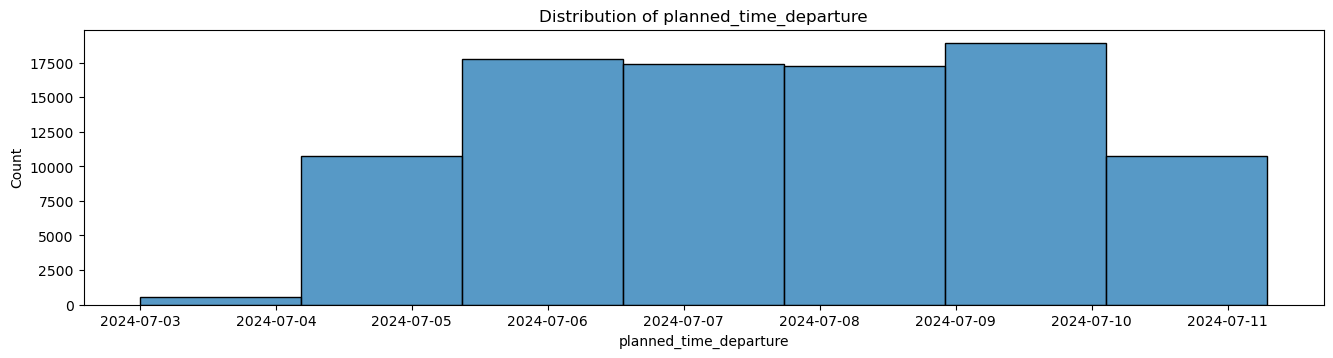

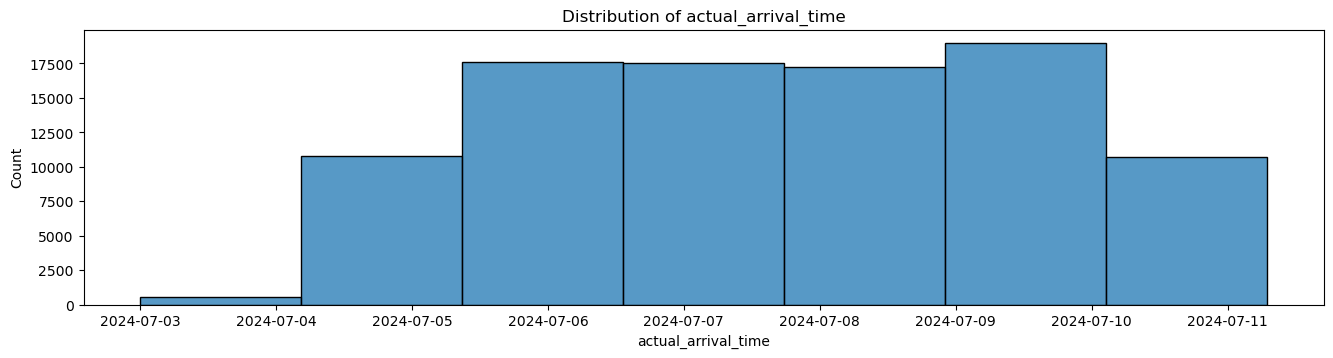

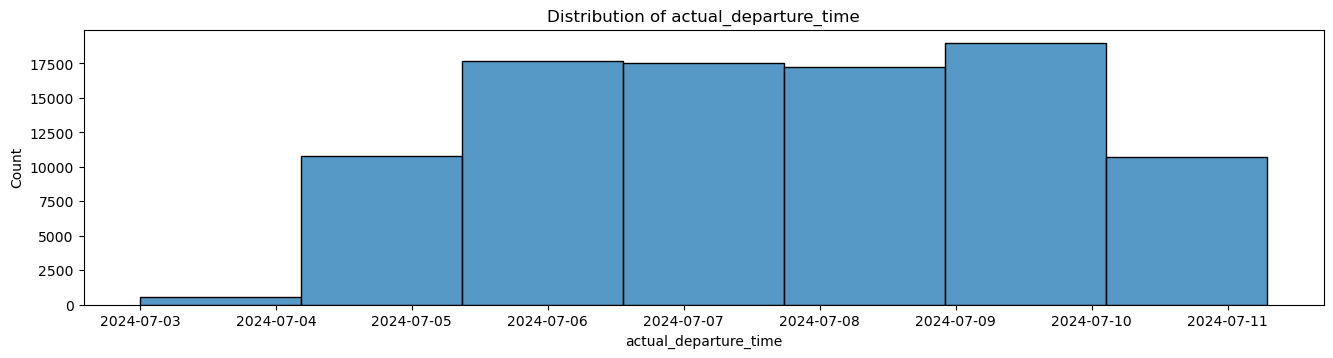

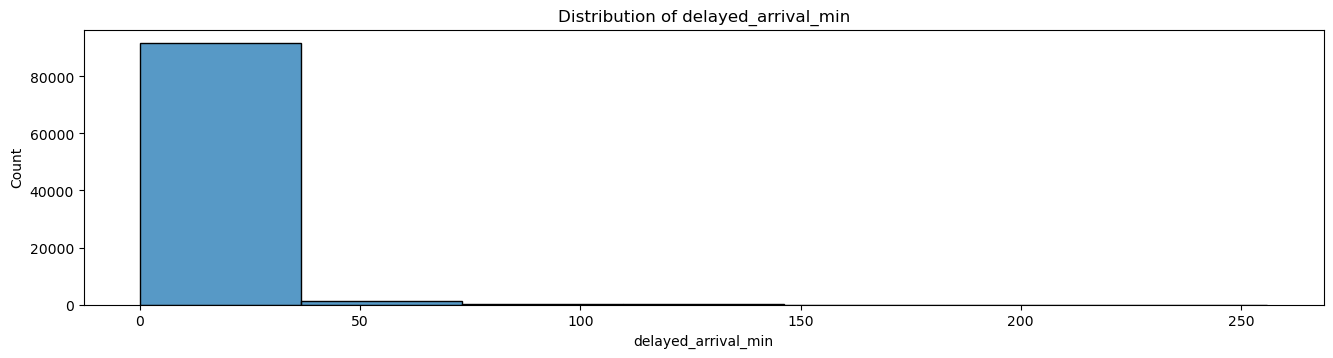

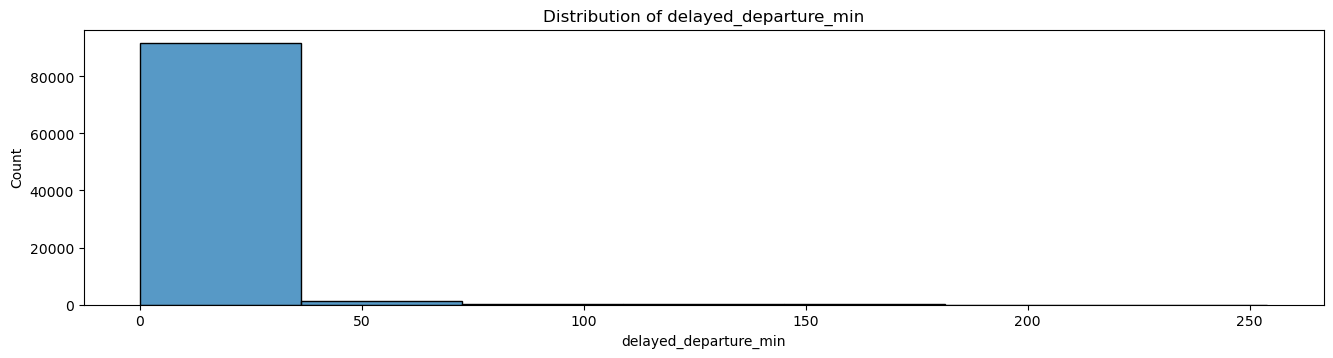

In [51]:
numerical_cols = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time', 
                  'delayed_arrival_min', 'delayed_departure_min']
subplot_index = 1
for col in numerical_cols:
    plt.figure(figsize=(16, 25))
    plt.subplot(len(numerical_cols),1,subplot_index)
    sns.histplot(df[col], bins=7)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical data

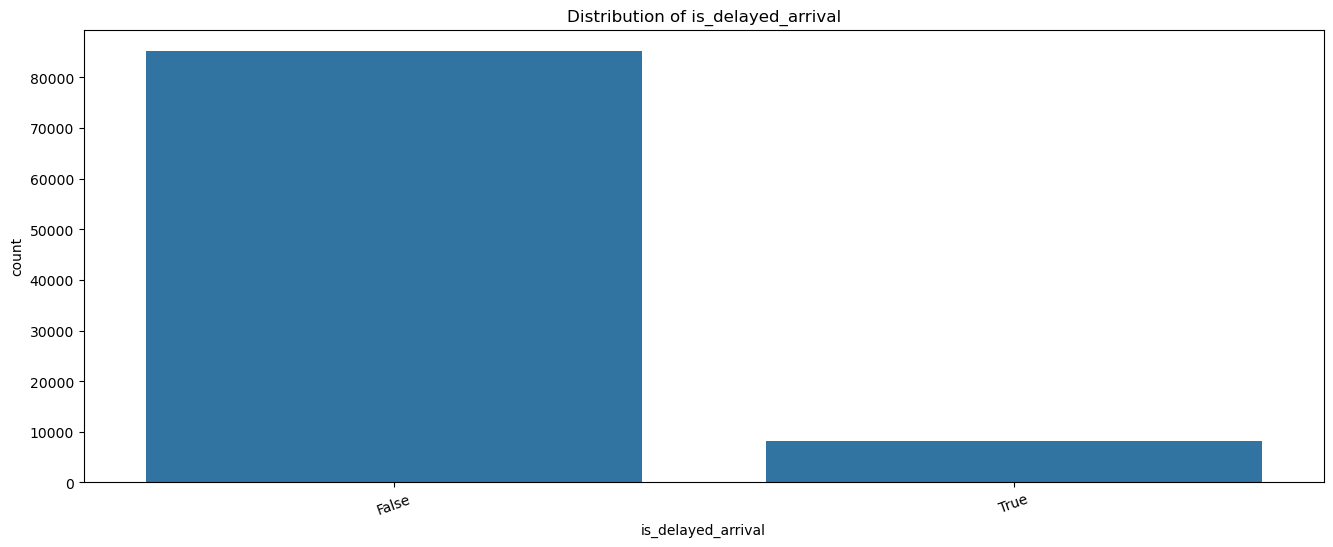

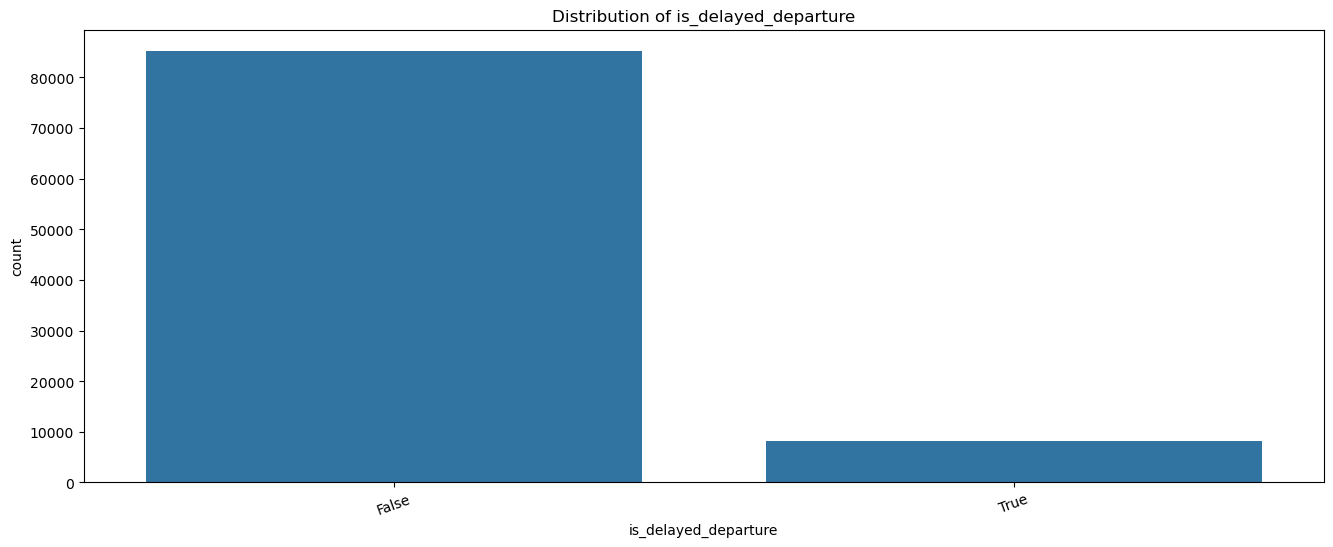

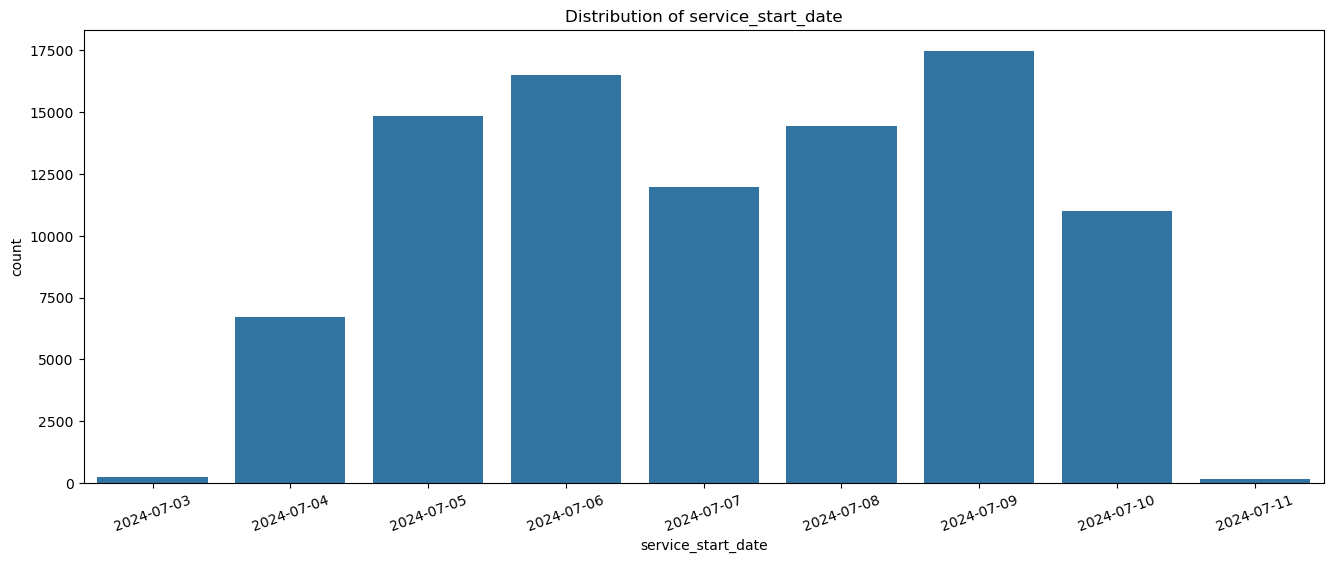

In [52]:
categorical_cols = ['is_delayed_arrival', 'is_delayed_departure','service_start_date']
#histograms for categorical variables
subplot_index = 1
for col in categorical_cols:
    plt.figure(figsize=(16, 20))
    plt.subplot(len(categorical_cols),1,subplot_index)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation = 20)
    plt.show()

### What is the distribution of if there is an actual delay in arrival and departure?

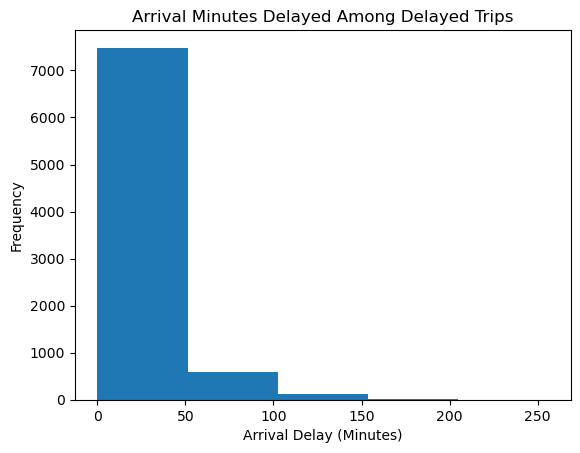

In [53]:
#creating a df with only delayed arrival trains
delayed_arrivals = df[df['is_delayed_arrival'] == True]
# Plotting the histogram using matplotlib
plt.hist(delayed_arrivals['delayed_arrival_min'], bins=5)

# Adding titles and labels
plt.title('Arrival Minutes Delayed Among Delayed Trips')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

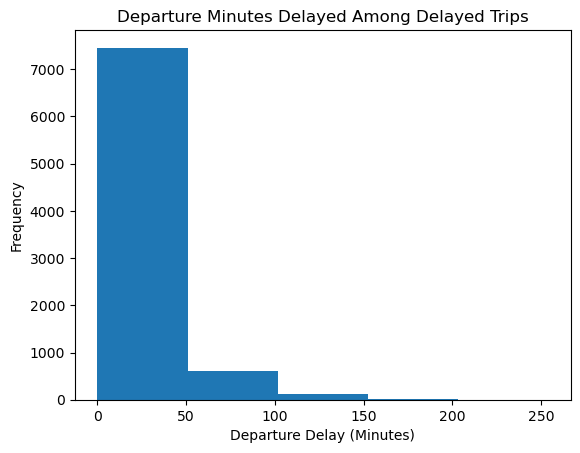

In [54]:
#creating a df with only delayed departure trains
delayed_departures = df[df['is_delayed_departure'] == True]
# Plotting the histogram using matplotlib
plt.hist(delayed_arrivals['delayed_departure_min'], bins=5)

# Adding titles and labels
plt.title('Departure Minutes Delayed Among Delayed Trips')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis among numerical data

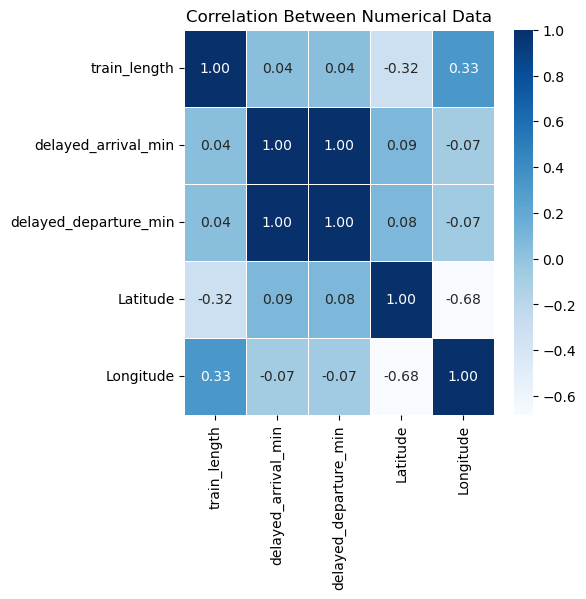

In [55]:
df1 = df[['train_length', 'delayed_arrival_min', 'delayed_departure_min', 'Latitude', 'Longitude']]
corr_matrix = df1.corr()

# Create a correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Data')
plt.show()

We found an absolute correlation between arrival delay and departure delay and decided to make a scatter plot to visualize the impact of Departure Delay on Arrival time.

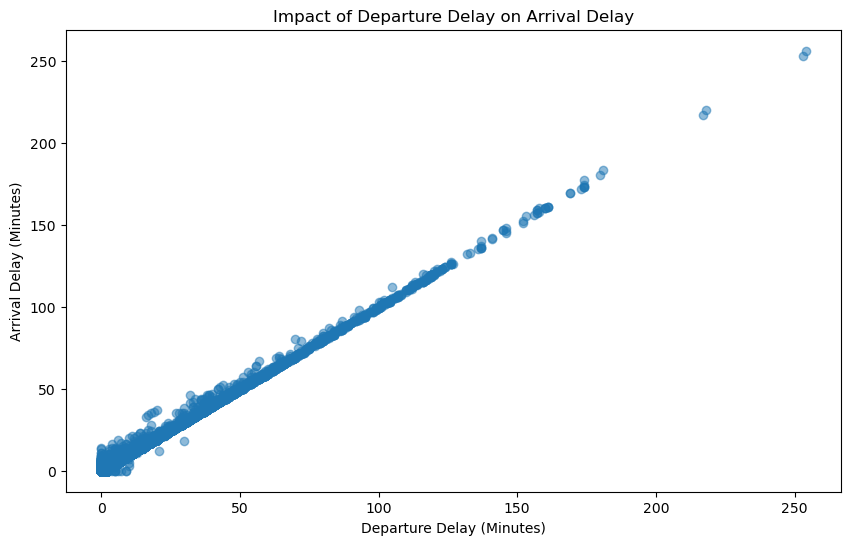

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df['delayed_departure_min'], df['delayed_arrival_min'], alpha=0.5)
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.title('Impact of Departure Delay on Arrival Delay')
plt.show()

This strong correlation of 1.00 shows that departure delay is significantly impacting the arrival time.

### 4. Analysis

Gathered external data to find insights for our questions.

Source: https://dataportal.orr.gov.uk/

### 1. Which stations are the most Busiest accessed by public? 

In [57]:
df2 = pd.read_excel(r'./Data/2.Passenger_population_station_TOC_2023.xlsx')

In [58]:
df2.head()

,StationName,Entry_exit_population,origin_or_destination,Region,Operator
0,Abbey Wood,7118664,Tottenham Court Road,London,Elizabeth line
1,Aber,103976,Cardiff Central,Wales,TfW Rail
2,Abercynon,134880,Cardiff Central,Wales,TfW Rail
3,Aberdare,226714,Cardiff Central,Wales,TfW Rail
4,Aberdeen,1961414,Edinburgh,Scotland,ScotRail


In [59]:
df2['StationName'] = df2['StationName'] + ' Rail Station'
df2['StationName']

0           Abbey Wood Rail Station
1                 Aber Rail Station
2            Abercynon Rail Station
3             Aberdare Rail Station
4             Aberdeen Rail Station
                   ...             
2570             Yoker Rail Station
2571              York Rail Station
2572            Yorton Rail Station
2573     Ystrad Mynach Rail Station
2574    Ystrad Rhondda Rail Station
Name: StationName, Length: 2575, dtype: object

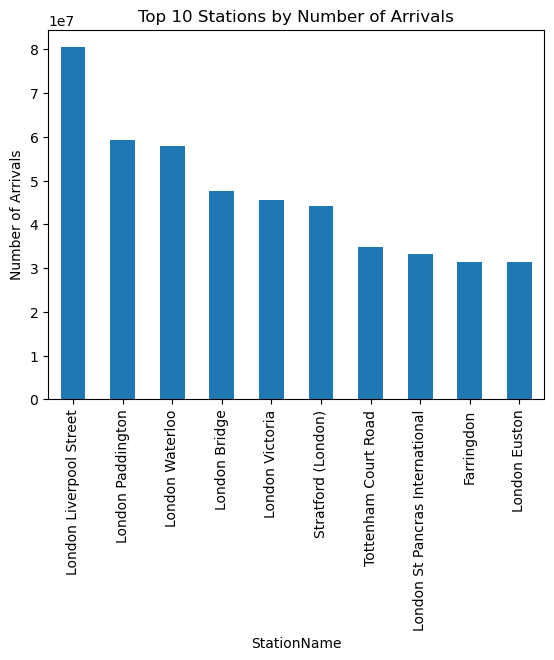

In [61]:
# Load the data
df2 = pd.read_excel('./Data/2.Passenger_population_station_TOC_2023.xlsx')

# Aggregate data by 'StationName' and sum the values
agg_data = df2.groupby('StationName').sum()

# Sort data by the 'Entry_exit_population' column in descending order
sorted_data = agg_data.sort_values(by='Entry_exit_population', ascending=False)

# Select the top 10 stations
top_10_stations = sorted_data.head(10)

# Plot the data
top_10_stations.plot(kind='bar', y='Entry_exit_population', legend=False)
plt.xlabel('StationName')
plt.ylabel('Number of Arrivals')
plt.title('Top 10 Stations by Number of Arrivals')
plt.show()

### 2. Which is the Busiest Region Accessed By the Public?

Index(['StationName', 'Entry_exit_population', 'origin_or_destination',
       'Region', 'Operator'],
      dtype='object')


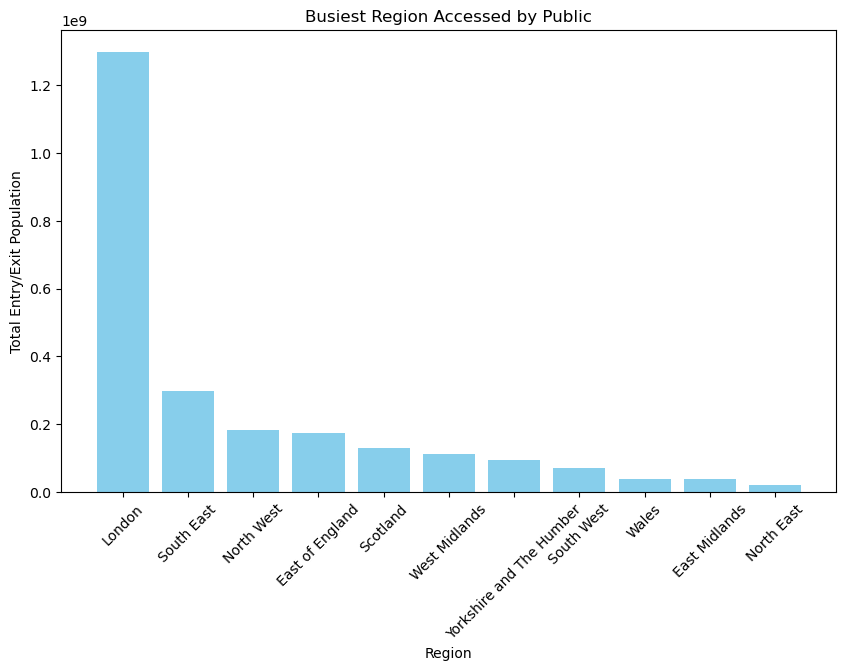

In [62]:
#Use the same dataframe as above
df = pd.read_excel('./Data/2.Passenger_population_station_TOC_2023.xlsx')

print(df.columns)

df.columns = df.columns.str.strip()

# Aggregate data by region
region_summary = df.groupby('Region')['Entry_exit_population'].sum().reset_index()

# Sort by Entry_exit_population in descending order
region_summary = region_summary.sort_values(by='Entry_exit_population', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(region_summary['Region'], region_summary['Entry_exit_population'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Entry/Exit Population')
plt.title('Busiest Region Accessed by Public')
plt.xticks(rotation=45)
plt.show()

### 3. Which Railway Operators are controlling more stations?

In [63]:
df3 = pd.read_excel(r'./Data/1.Train_Operating_Company_Stations_list_2023.xlsx')

In [64]:
df3.head()

,Operator,Stations_associated(As of 31 March 2023)
0,Avanti West Coast,16
1,c2c,25
2,Caledonian Sleeper \n,0
3,Chiltern Railways,35
4,CrossCountry,0


Index(['Operator', 'Stations_associated(As of 31 March 2023)'], dtype='object')


<Figure size 1500x800 with 0 Axes>

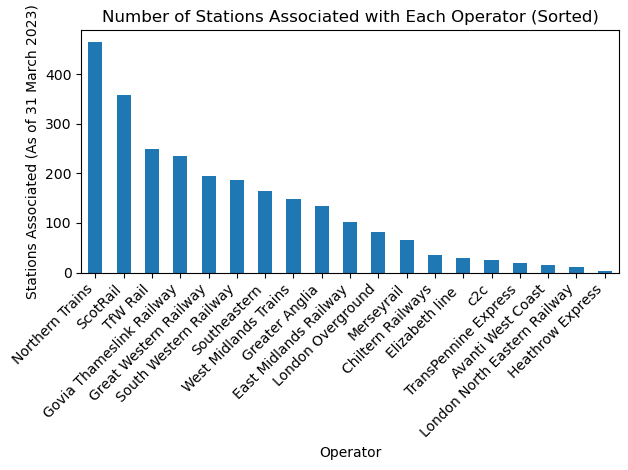

In [66]:
df3 = pd.read_excel('./Data/1.Train_Operating_Company_Stations_list_2023.xlsx')

print(df3.columns)

filtered_df3 = df3[(df3 != 0).all(axis=1)]

sorted_df3 = filtered_df3.sort_values(by=['Stations_associated(As of 31 March 2023)', 'Operator'], ascending=[False, True])

# Plot the data
plt.figure(figsize=(15, 8))
sorted_df3.plot(kind='bar', x='Operator', y='Stations_associated(As of 31 March 2023)', legend=False)
plt.xlabel('Operator')
plt.ylabel('Stations Associated (As of 31 March 2023)')
plt.title('Number of Stations Associated with Each Operator (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Railways usage by Public over the years

In [77]:
df4 = pd.read_excel(r'./Data/Passenger_population_1997_2022.xlsx')

In [78]:
df4.head()

,Year,Population
0,1997,1.233688e+09
1,1998,1.400309e+09
2,1999,1.447963e+09
3,2000,1.459770e+09
4,2001,1.468899e+09


In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        26 non-null     int64  
 1   Population  25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 548.0 bytes


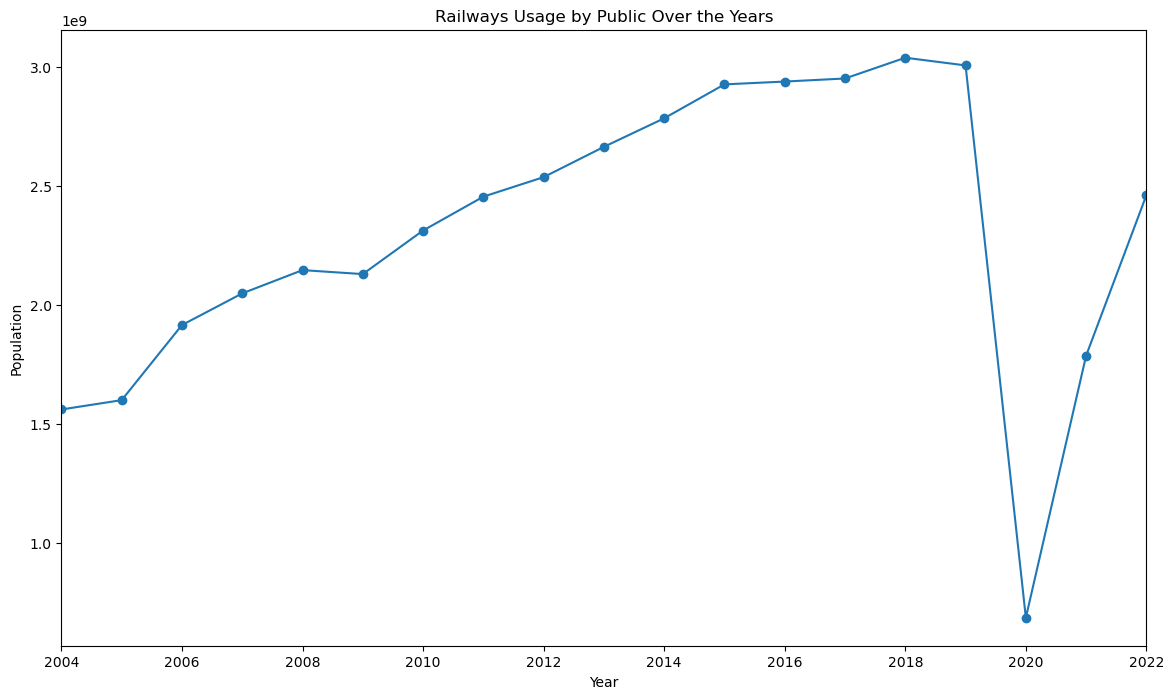

In [80]:
# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(df4['Year'], df4['Population'], marker='o')
plt.title('Railways Usage by Public Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xlim(2004, 2022)
plt.show()

Railway usage peaked around 2018 before covid and it is slowly recovering but has not reached the same level as before the pandemic